# SpringBoard Career Track Unit 17.3 -- Ultimate TakeHome Challenge

## Part III - EDA

## In this notebook, we explore the data to get insight for model development

### In particular, we look at characteristics with respect to whether or not a rider was retained in order to get insight if there are potential predictors

# Summary
Even though signup date does not directly generalize well, looks as though more generalized information can be extracted...for example, possible signup day of week, or possibly time of day, etc.


In [1]:
import json
from datetime import datetime
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('ultimate_data_challenge.json', 'r') as json_file:
    json_trips = json.load(json_file)

In [3]:
print(type(json_trips), len(json_trips))


<class 'list'> 50000


In [4]:
# look at format of first data item
json_trips[0]

{'city': "King's Landing",
 'trips_in_first_30_days': 4,
 'signup_date': '2014-01-25',
 'avg_rating_of_driver': 4.7,
 'avg_surge': 1.1,
 'last_trip_date': '2014-06-17',
 'phone': 'iPhone',
 'surge_pct': 15.4,
 'ultimate_black_user': True,
 'weekday_pct': 46.2,
 'avg_dist': 3.67,
 'avg_rating_by_driver': 5.0}

In [5]:
trips = pd.DataFrame(json_trips)

In [6]:
trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [7]:
trips.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
# create date objects from data strings 

trips['signup_dt'] = pd.to_datetime(trips.signup_date)
trips['last_trip_dt'] = pd.to_datetime(trips.last_trip_date)
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  object        
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  signup_dt               50000 non-null  dateti

In [10]:
 trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_dt,last_trip_dt
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-01-25,2014-06-17
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-01-29,2014-05-05
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-01-06,2014-01-07
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-01-10,2014-06-29
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-01-27,2014-03-15


In [11]:
# get min/max dates for signup_dt and lat_trip_dt

trips['signup_dt'].min(), trips['signup_dt'].max(), trips['last_trip_dt'].min(), trips['last_trip_dt'].max()

(Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-01-31 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'))

# Plot number of signups by date

Partially because this will not generalize well, and in initial model development, appeared to be used as an over-fitting characteristic

Text(0, 0.5, 'Count')

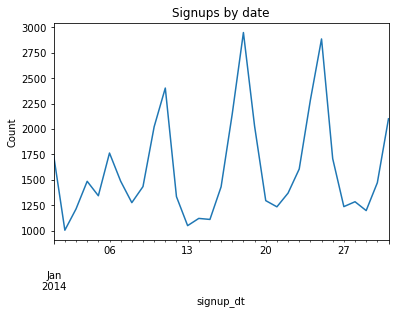

In [12]:
trips.groupby('signup_dt').city.count().sort_values(ascending=False)
trips.groupby('signup_dt').city.count().plot()
plt.title('Signups by date')
plt.ylabel('Count')

In [13]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  object        
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  signup_dt               50000 non-null  dateti

## clean up missing values

In [14]:
trips.phone.isnull().sum()

396

In [15]:
trips.phone.fillna('unknown',inplace=True) 
trips.phone.isnull().sum()

0

In [16]:
trips.avg_rating_by_driver.fillna(trips.avg_rating_by_driver.mean(),inplace=True)
trips.avg_rating_of_driver.fillna(trips.avg_rating_of_driver.mean(),inplace=True)
trips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  object        
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  signup_dt               50000 non-null  dateti

In [17]:
trips.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'signup_dt', 'last_trip_dt'],
      dtype='object')

# Generate label

In [18]:
trips.last_trip_date.max()

'2014-07-01'

In [19]:
type((pd.to_datetime(trips.last_trip_date.max()) - trips.last_trip_dt))

pandas.core.series.Series

In [20]:
trips['label'] = (pd.to_datetime(trips.last_trip_date.max()) - trips.last_trip_dt).dt.days <= 30 
trips['label'] = trips['label'].astype(int)

 

In [21]:
trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_dt,last_trip_dt,label
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-01-25,2014-06-17,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-01-29,2014-05-05,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-01-06,2014-01-07,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-01-10,2014-06-29,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-01-27,2014-03-15,0


In [22]:
# get percent retained
trips.label.mean()

0.37608

In [23]:
trips.label.value_counts()

0    31196
1    18804
Name: label, dtype: int64

In [24]:
trips.ultimate_black_user.value_counts(), trips.ultimate_black_user.isna().sum()

(False    31146
 True     18854
 Name: ultimate_black_user, dtype: int64,
 0)

In [25]:
trips4plot = trips.copy(deep=True)
trips4plot['ultimate_black_user'] = trips4plot['ultimate_black_user'].astype(int)
#trips['label'] = trips['label'].astype(int)

C:\Users\rozoe\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\rozoe\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


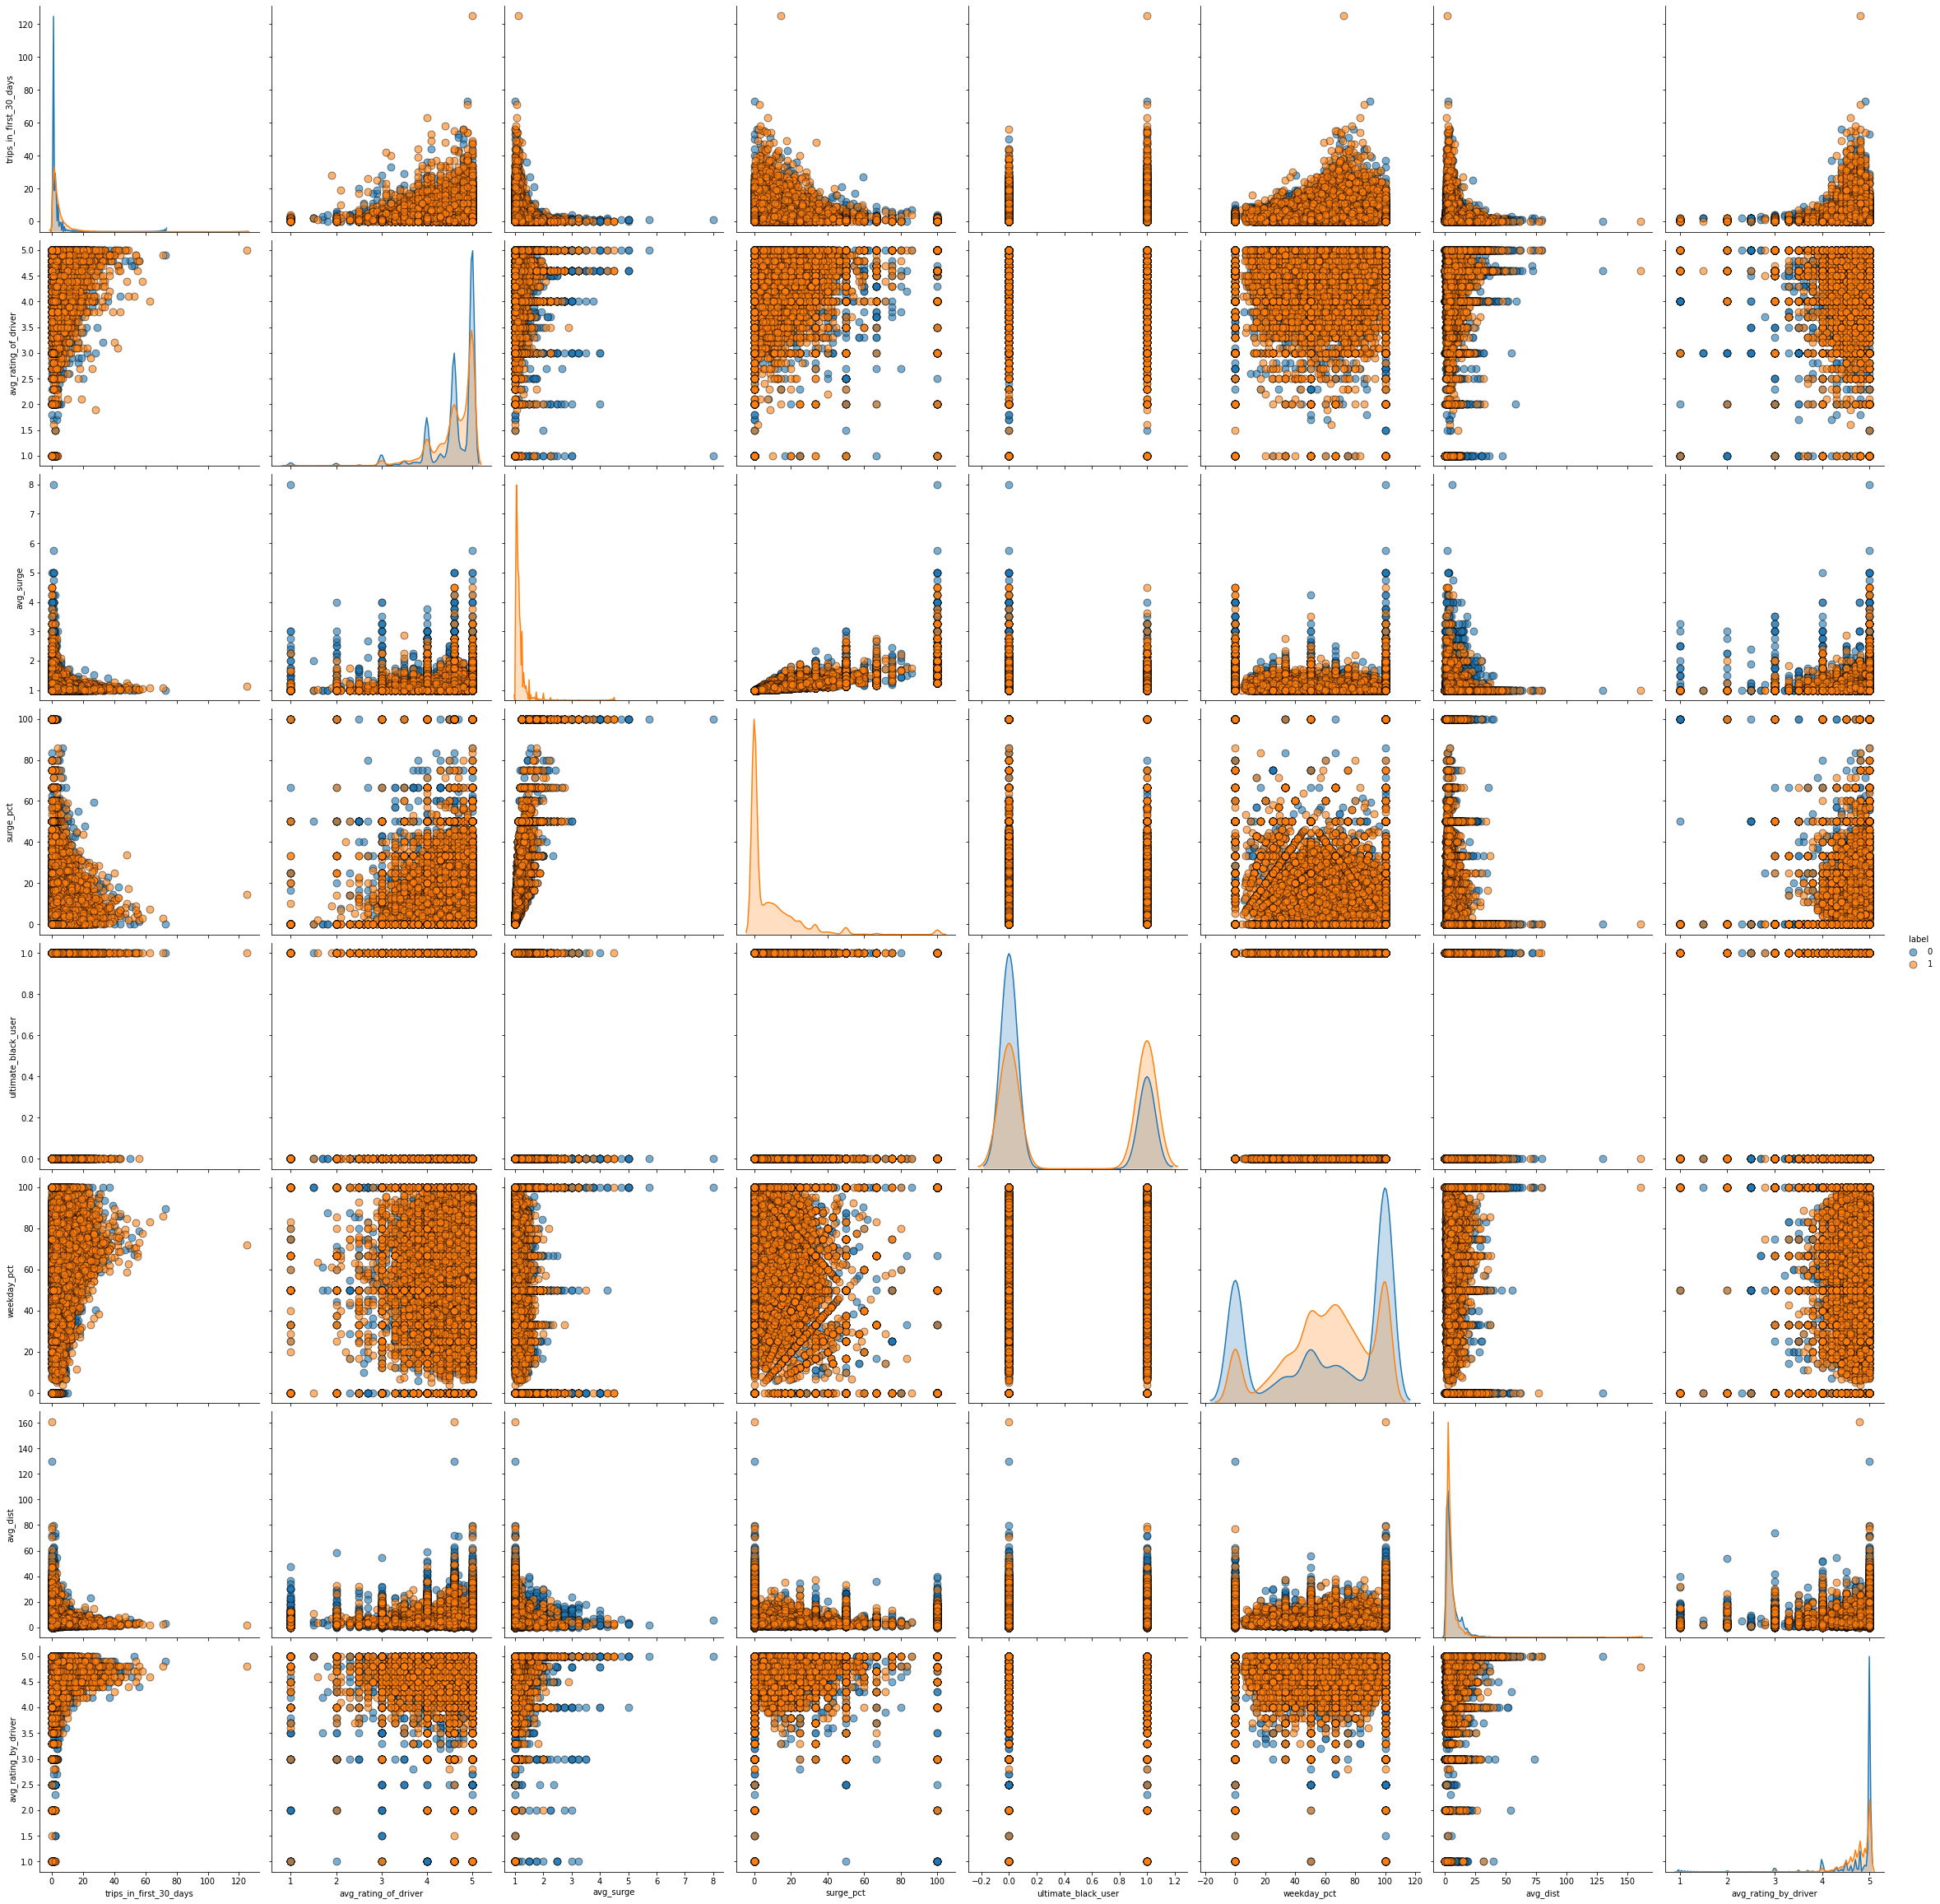

In [26]:
sns.pairplot(trips4plot, hue = 'label', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

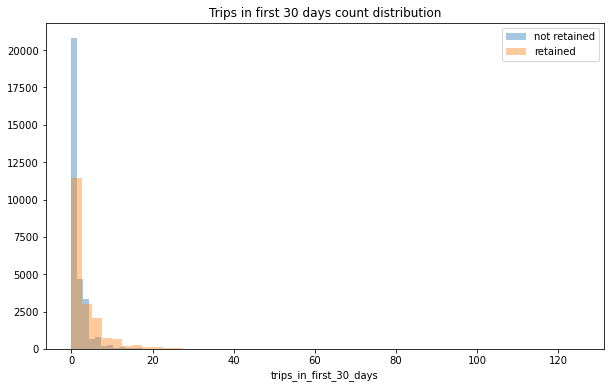

In [27]:
# Trips in first 30 days -- FULL RANGE -- counts
fig = plt.figure(figsize=(10,6))
ax = sns.distplot(trips4plot[trips4plot['label']==0].trips_in_first_30_days, label='not retained', kde=False)
sns.distplot(trips4plot[trips4plot['label']==1].trips_in_first_30_days , label='retained', kde=False)
ax.set_title('Trips in first 30 days count distribution')
plt.legend()

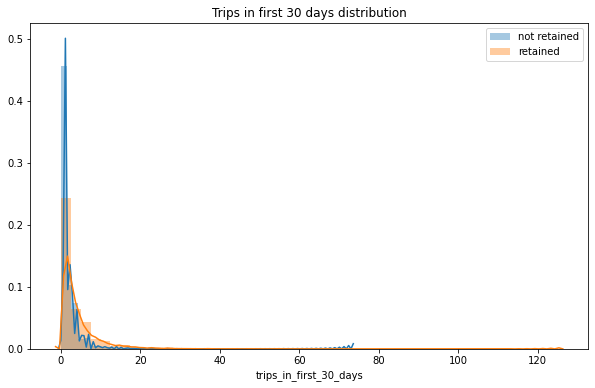

In [28]:
# Trips in first 30 days -- FULL RANGE -- proportions
fig = plt.figure(figsize=(10,6))
ax = sns.distplot(trips4plot[trips4plot['label']==0].trips_in_first_30_days, label='not retained')
sns.distplot(trips4plot[trips4plot['label']==1].trips_in_first_30_days , label='retained')
ax.set_title('Trips in first 30 days distribution')
plt.legend()


In [29]:
temp = trips4plot.groupby(['trips_in_first_30_days', 'label']).label.count()
temp.head(11), temp.tail(11)

(trips_in_first_30_days  label
 0                       0         9810
                         1         5580
 1                       0        10983
                         1         3125
 2                       0         4659
                         1         2743
 3                       0         2095
                         1         1693
 4                       0         1249
                         1         1313
 5                       0          690
 Name: label, dtype: int64,
 trips_in_first_30_days  label
 53                      0        1
                         1        1
 54                      1        2
 55                      1        2
 56                      0        1
                         1        1
 58                      1        1
 63                      1        1
 71                      1        1
 73                      0        1
 125                     1        1
 Name: label, dtype: int64)

Text(0, 0.5, 'Number of riders')

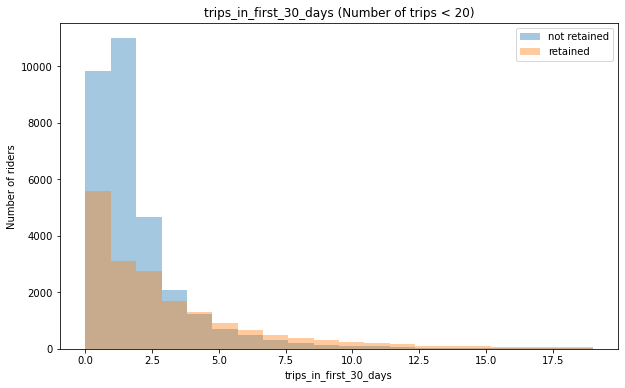

In [30]:
# Trips in first 30 days -- ZOOM
t = trips4plot[trips4plot.trips_in_first_30_days < 20]
fig = plt.figure(figsize=(10,6))
ax = sns.distplot(t[t['label']==0].trips_in_first_30_days , label='not retained', kde=False, bins=20)
sns.distplot(t[t['label']==1].trips_in_first_30_days, label='retained', kde=False, bins=20)
ax.set_title('trips_in_first_30_days' + ' (Number of trips < 20)')
plt.legend()
plt.ylabel('Number of riders')

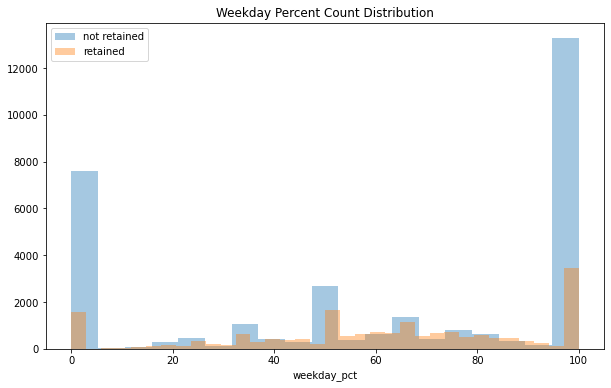

In [31]:
# Week Day Percent
fig = plt.figure(figsize=(10,6))
ax = sns.distplot(trips4plot[trips4plot['label']==0].weekday_pct , label='not retained', kde=False)
sns.distplot(trips4plot[trips4plot['label']==1].weekday_pct , label='retained', kde=False)
ax.set_title('Weekday Percent Count Distribution')
plt.legend()

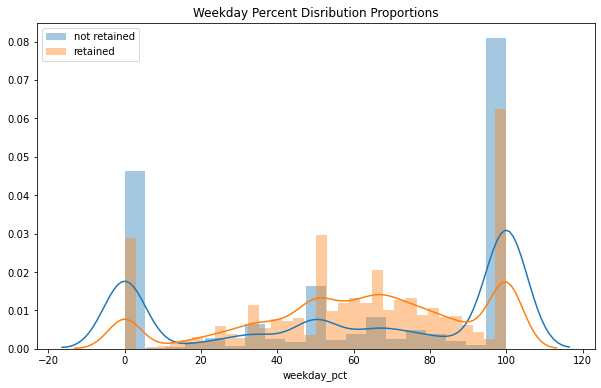

In [32]:
# Week Day Percent
fig = plt.figure(figsize=(10,6))
ax = sns.distplot(trips4plot[trips4plot['label']==0].weekday_pct , label='not retained')
sns.distplot(trips4plot[trips4plot['label']==1].weekday_pct , label='retained')
ax.set_title('Weekday Percent Disribution Proportions')
plt.legend()

In [33]:
trips4plot

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_dt,last_trip_dt,label
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,2014-01-25,2014-06-17,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,2014-01-29,2014-05-05,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,2014-01-06,2014-01-07,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2014-01-10,2014-06-29,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,2014-01-27,2014-03-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,0,100.0,5.63,4.2,2014-01-25,2014-06-05,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,0,0.0,0.00,4.0,2014-01-24,2014-01-25,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,1,100.0,3.86,5.0,2014-01-31,2014-05-22,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,0,100.0,4.58,3.5,2014-01-14,2014-01-15,0


In [34]:
list(trips4plot.columns)

['city',
 'trips_in_first_30_days',
 'signup_date',
 'avg_rating_of_driver',
 'avg_surge',
 'last_trip_date',
 'phone',
 'surge_pct',
 'ultimate_black_user',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 'signup_dt',
 'last_trip_dt',
 'label']

C:\Users\rozoe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Proportion Retained')

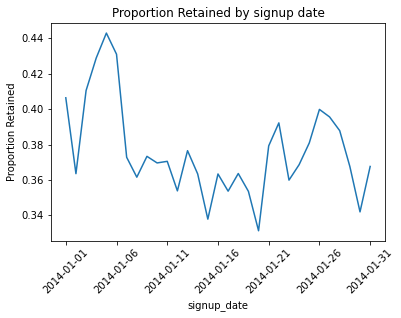

In [35]:
trips4plot.groupby('signup_date').label.mean().plot()
plt.xticks(rotation=45)   
plt.title('Proportion Retained by signup date')
plt.ylabel('Proportion Retained')

C:\Users\rozoe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


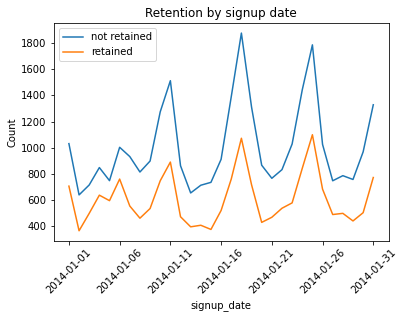

In [36]:
trips4plot[trips4plot.label==0].groupby('signup_date').city.count().plot(label='not retained')
trips4plot[trips4plot.label==1].groupby('signup_date').city.count().plot(label='retained')
plt.xticks(rotation=45)   
plt.title('Retention by signup date')
plt.ylabel('Count')
plt.legend()

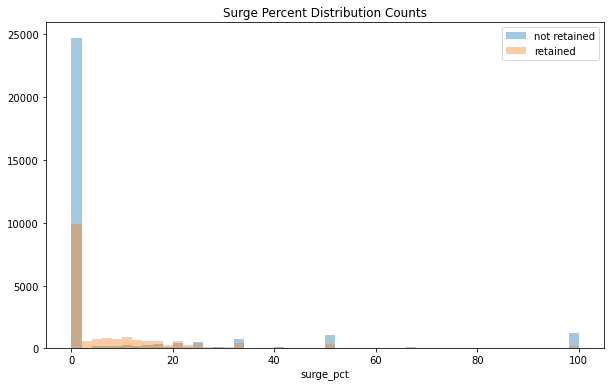

In [37]:
# surge percent

fig = plt.figure(figsize=(10,6))

ax = sns.distplot(trips4plot[trips4plot['label']==0].surge_pct, label='not retained', kde=False)
sns.distplot(trips4plot[trips4plot['label']==1].surge_pct, label='retained', kde=False)
ax.set_title('Surge Percent Distribution Counts')
plt.legend()

C:\Users\rozoe\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


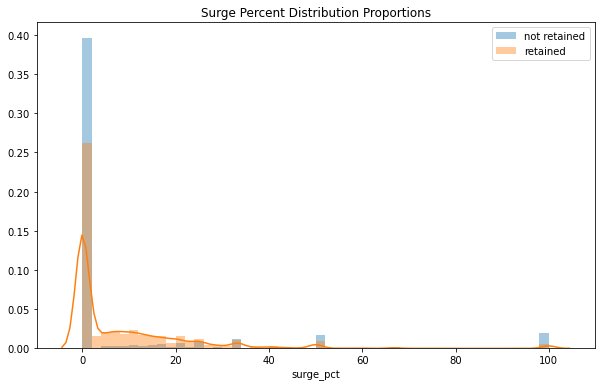

In [38]:
# surge percent

fig = plt.figure(figsize=(10,6))

ax = sns.distplot(trips4plot[trips4plot['label']==0].surge_pct, label='not retained')
sns.distplot(trips4plot[trips4plot['label']==1].surge_pct, label='retained')
ax.set_title('Surge Percent Distribution Proportions')
plt.legend()

In [39]:
trips4plot[trips4plot['label']==1]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_dt,last_trip_dt,label
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,2014-01-25,2014-06-17,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2014-01-10,2014-06-29,1
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,1,100.0,10.56,5.0,2014-01-09,2014-06-06,1
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,0,50.0,3.04,5.0,2014-01-29,2014-06-08,1
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,1,50.0,10.86,3.0,2014-01-11,2014-06-28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49976,King's Landing,0,2014-01-21,2.0,1.00,2014-07-01,iPhone,0.0,0,100.0,2.39,4.0,2014-01-21,2014-07-01,1
49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,0,50.0,2.53,5.0,2014-01-20,2014-06-14,1
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,0,0.0,1.06,5.0,2014-01-08,2014-06-29,1
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,1,55.6,2.53,4.7,2014-01-03,2014-07-01,1
